In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, confusion_matrix, average_precision_score
warnings.filterwarnings('ignore')

In [2]:
methods = [
    ('KNN', KNeighborsClassifier(n_neighbors=  3)),
    ('Random Forest', RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )),
    ('MLP', MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
    )),
    ('SVM', SVC(
        kernel = 'rbf',
        C = 1,
        gamma = 'scale',
        class_weight='balanced',
        probability=True
        ))
]

In [3]:
methods2 = [
    ('Origin', 'Data/d6/Balanced Data/origin.csv'),
    ('SMOTE', 'Data/d6/Balanced Data/SMOTE.csv'),
    ('SMOTE NC', 'Data/d6/Balanced Data/SMOTENC.csv'),
    ('ADASYN', 'Data/d6/Balanced Data/ADASYN.csv'),
    ('Near Miss', 'Data/d6/Balanced Data/NearMiss.csv'),
    ('Tomek Links', 'Data/d6/Balanced Data/TomekLinks.csv'),
    ('ENN', 'Data/d6/Balanced Data/ENN.csv'),
    ('SMOTE ENN', 'Data/d6/Balanced Data/SMOTEENN.csv'),
    ('SMOTE Tomek', 'Data/d6/Balanced Data/SMOTETomek.csv')
]

# 2. Huấn luyện mô hình

In [ ]:
# from re import X
project_url = '../../../../source/DU_AN_CNTT_2/'
project_url = glob.glob(project_url)[0]
scores_list = []
time_list = []
test = pd.read_csv(os.path.join(project_url, 'Data/d6/test.csv')).copy()
X_test = test.drop('Class', axis=1)
y_test = test['Class']
import time
for name, method in methods:
    print(f'Model: {name}')
    print('-'*100)
    for name2, path in methods2:
        print(f'Model: {name}. Method: {name2}')
        start = time.time()
        path = os.path.join(project_url, path)
        df = pd.read_csv(path).copy()
        X_train = df.drop('Class', axis=1)
        y_train = df['Class']
        # if name == 'SVM':
        #     X_train = X_train.sample(frac=0.4, random_state=42)
        #     y_train = y_train.loc[X_train.index]
        #     X_train.reset_index(drop=True, inplace=True)
        #     y_train.reset_index(drop=True, inplace=True)
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)
        precision = precision_score(y_test, y_pred, average = None)
        recall = recall_score(y_test, y_pred, average = None)
        f1 = f1_score(y_test, y_pred, average = None)
        average_pre = average_precision_score(y_test, y_prob, average = None)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average = None)
        cm = confusion_matrix(y_test, y_pred)
        scores = {
            'Method': ' - '.join([name2, name]),
            'Precision': precision,
            'Average Precision': average_pre,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': cm
        }
        end = time.time()
        t = np.round(end - start, 2)
        t = {
            'Method': ' - '.join([name2, name]),
            'Time': t
        }
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'Time to train {t["Method"]} is {t["Time"]} seconds.\n')
        time_list.append(t)
        scores_list.append(scores)




Model: KNN
----------------------------------------------------------------------------------------------------
Model: KNN. Method: Origin
Precision: [0.8983107  0.41016949 0.82781955]
Recall: [0.98618182 0.25313808 0.77754237]
Time to train Origin - KNN is 0.48 seconds.

Model: KNN. Method: SMOTE
Precision: [0.92222222 0.28865979 0.80395257]
Recall: [0.90545455 0.41004184 0.71822034]
Time to train SMOTE - KNN is 0.57 seconds.

Model: KNN. Method: SMOTE NC
Precision: [0.91910688 0.30434783 0.79783114]
Recall: [0.91309091 0.39539749 0.72740113]
Time to train SMOTE NC - KNN is 0.6 seconds.

Model: KNN. Method: ADASYN
Precision: [0.92846213 0.25232198 0.75144509]
Recall: [0.88254545 0.34100418 0.73446328]
Time to train ADASYN - KNN is 0.57 seconds.

Model: KNN. Method: Near Miss
Precision: [0.92006189 0.1497093  0.65763732]
Recall: [0.64872727 0.43096234 0.61723164]
Time to train Near Miss - KNN is 0.25 seconds.

Model: KNN. Method: Tomek Links
Precision: [0.89649471 0.38997214 0.83901665

In [5]:
s = pd.DataFrame(scores_list)
s.index = pd.MultiIndex.from_tuples(s['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
s = s.drop('Method', axis=1)
s.index.names = ['Model', 'Method']
s['Confusion Matrix']

Model          Method     
KNN            Origin         [[2712, 25, 13], [141, 121, 216], [166, 149, 1...
               SMOTE          [[2490, 197, 63], [97, 196, 185], [113, 286, 1...
               SMOTE NC       [[2511, 162, 77], [105, 189, 184], [116, 270, ...
               ADASYN         [[2427, 206, 117], [88, 163, 227], [99, 277, 1...
               Near Miss      [[1784, 708, 258], [75, 206, 197], [80, 462, 8...
               Tomek Links    [[2711, 34, 5], [140, 140, 198], [173, 185, 10...
               ENN            [[2616, 131, 3], [131, 256, 91], [181, 335, 900]]
               SMOTE ENN      [[2480, 248, 22], [96, 244, 138], [116, 343, 9...
               SMOTE Tomek    [[2510, 189, 51], [97, 194, 187], [115, 285, 1...
Random Forest  Origin           [[2750, 0, 0], [94, 262, 122], [80, 273, 1063]]
               SMOTE            [[2750, 0, 0], [94, 243, 141], [80, 221, 1115]]
               SMOTE NC         [[2750, 0, 0], [94, 264, 120], [80, 301, 1035]]
             

In [6]:
cm = s['Confusion Matrix']
s.drop('Confusion Matrix', axis=1, inplace=True)
names = ['No Diabetes', 'Prediabetes', 'Diabetes']
cols = s.columns
for i in cols:
    s[i] = s[i].apply(lambda x: np.round(x, 4)*100)
    for j in range(len(names)):
        s[(i, names[j])] = s[i].apply(lambda x: x[j])
    s[(i,'macro')] = s[i].apply(lambda x: np.round(np.mean(x),2))
s.drop(cols, axis=1, inplace=True)
s.columns = pd.MultiIndex.from_tuples(s.columns)
s

Precision                              \
                          No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                
KNN           Origin            89.83       41.02    82.78  71.21   
              SMOTE             92.22       28.87    80.40  67.16   
              SMOTE NC          91.91       30.43    79.78  67.37   
              ADASYN            92.85       25.23    75.14  64.41   
              Near Miss         92.01       14.97    65.76  57.58   
              Tomek Links       89.65       39.00    83.90  70.85   
              ENN               89.34       35.46    90.54  71.78   
              SMOTE ENN         92.12       29.22    85.68  69.01   
              SMOTE Tomek       92.21       29.04    81.02  67.42   
Random Forest Origin            94.05       48.97    89.70  77.57   
              SMOTE             94.05       52.37    88.77  78.40   
              SMOTE NC          94.05       46.73    89.61  76.80   
              ADASYN            94.05       52.35    88.90  78.43   
              Near Miss         94.18       27.94    87.38  69.83   
              Tomek Links       94.05       48.15    90.37  77.52   
              ENN               95.28       39.64    92.95  75.96   
              SMOTE ENN         94.05       49.06    89.73  77.61   
              SMOTE Tomek       94.05       52.46    88.91  78.47   
MLP           Origin            94.23       55.15    85.44  78.27   
              SMOTE             95.08       38.76    89.88  74.57   
              SMOTE NC          95.80       37.12    87.25  73.39   
              ADASYN            95.55       43.13    82.87  73.85   
              Near Miss         93.93       17.39    79.57  63.63   
              Tomek Links       94.05       52.64    86.79  77.83   
              ENN               94.61       39.82    91.94  75.46   
              SMOTE ENN         95.61       34.84    87.93  72.79   
              SMOTE Tomek       94.95       41.36    87.27  74.53   
SVM           Origin            94.71       41.94    91.67  76.11   
              SMOTE             95.13       40.38    90.00  75.17   
              SMOTE NC          95.22       39.45    90.05  74.91   
              ADASYN            95.36       38.72    87.48  73.85   
              Near Miss         92.89       15.53    83.50  63.97   
              Tomek Links       94.71       41.91    91.97  76.20   
              ENN               95.19       38.34    93.10  75.54   
              SMOTE ENN         95.33       39.23    90.29  74.95   
              SMOTE Tomek       95.03       40.08    89.75  74.95   

                          Average Precision                              \
                                No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                      
KNN           Origin                  93.28       24.28    79.31  65.62   
              SMOTE                   92.79       20.86    73.44  62.36   
              SMOTE NC                92.55       21.02    73.99  62.52   
              ADASYN                  92.41       18.13    70.84  60.46   
              Near Miss               84.35       13.26    60.87  52.83   
              Tomek Links             93.24       24.60    78.95  65.60   
              ENN                     91.54       28.38    73.35  64.42   
              SMOTE ENN               90.58       21.87    70.88  61.11   
              SMOTE Tomek             92.80       20.87    73.26  62.31   
Random Forest Origin                  98.44       51.82    92.71  80.99   
              SMOTE                   98.38       49.97    92.27  80.21   
              SMOTE NC                98.18       48.19    91.58  79.32   
              ADASYN                  98.42       49.84    92.05  80.10   
              Near Miss               96.51       34.43    86.28  72.41   
              Tomek Links             98.41       51.92    92

In [7]:
metrics = s.columns.get_level_values(0).drop_duplicates()
for metric in metrics:
    path = os.path.join(project_url, f'Result/d6/Scores/{metric}.csv')
    s[metric].to_csv(path)
    print(f'Saved {metric}.')

Saved Precision.
Saved Average Precision.
Saved Recall.
Saved F1 Score.
Saved ROC AUC.


In [8]:
import matplotlib.gridspec as gridspec

Saved ../../../../source/DỰ ÁN CNTT 2/Result/d6/ConfusionMatrix.png.


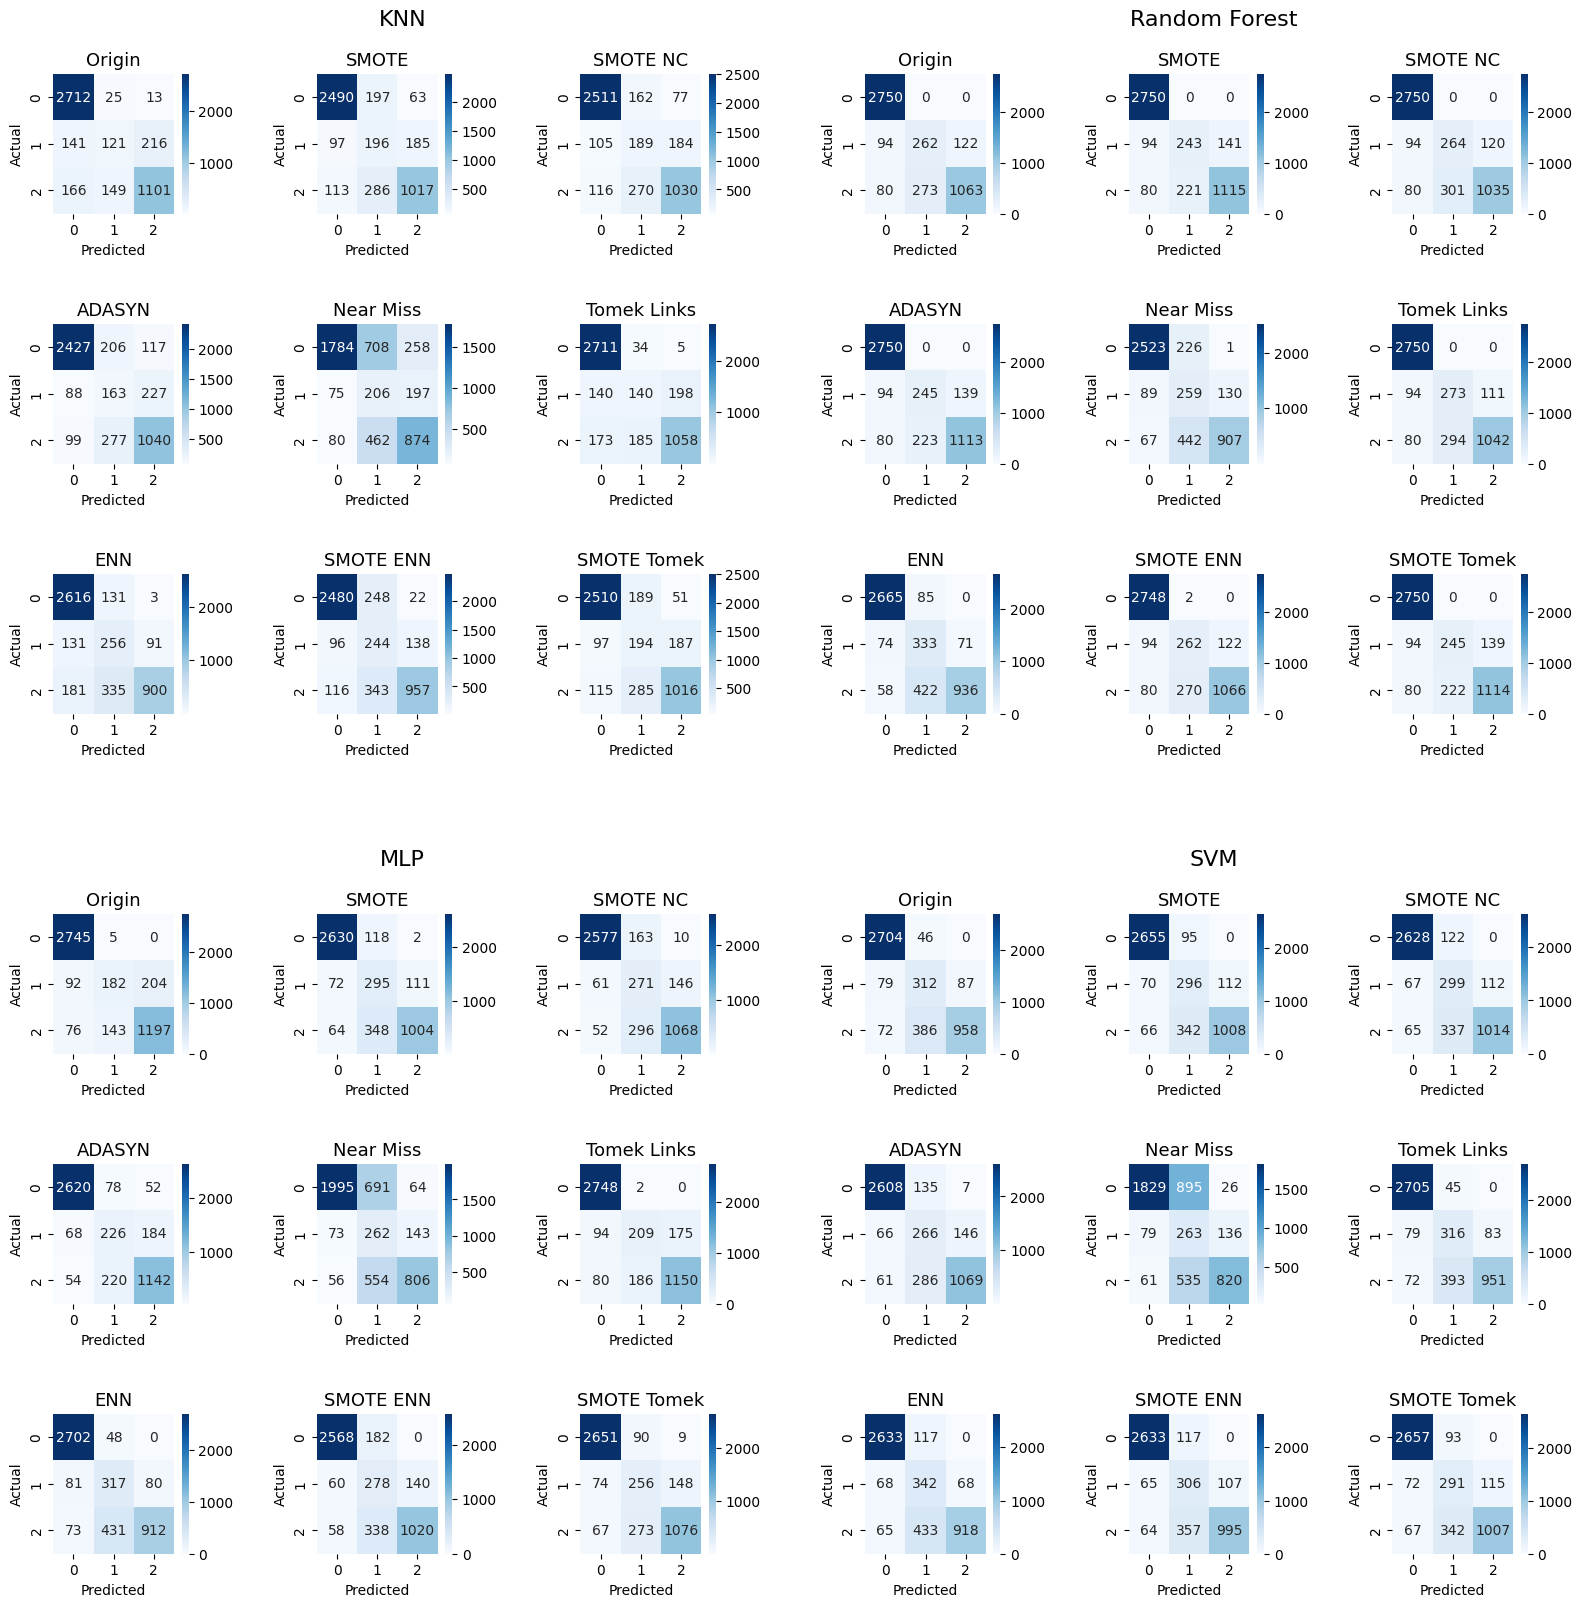

In [9]:
models = cm.index.get_level_values(0).drop_duplicates()
methods = cm.index.get_level_values(1).drop_duplicates()
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.2)

c2 = 0
fig = plt.figure(figsize=(20,20))
# fig.suptitle('Confusion Matrix', fontsize=10)
for model in models:
    c = 0
    gs2 = gridspec.GridSpecFromSubplotSpec(3,3,
                    subplot_spec=gs[c2], wspace=0.25, hspace=0.25)
    ax = fig.add_subplot(gs[c2])
    ax.set_title(f'{model}', fontsize=16)
    ax.axis('off')
    for method in methods:
        pos = gs2[c].get_position(fig)
        pos.x0 += 0.01
        pos.y0 += 0.01
        pos.x1 -= 0.02
        pos.y1 -= 0.02
        ax2 = plt.Subplot(fig, pos)
        # ax2 = plt.Subplot(fig, gs2[c])

        ax2.set_title(f'{method}', fontsize = 13)
        cm_ = cm[(model, method)]
        sns.heatmap(cm_, annot=True, fmt='g', cmap='Blues', ax=ax2)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        c += 1
        fig.add_axes(ax2)
        plt.tight_layout()
    c2 += 1
fig.show()
path = os.path.join(project_url, f'Result/d6/ConfusionMatrix.png')
# plt.savefig(path)
fig.savefig(path, bbox_inches='tight')
print(f'Saved {path}.')

In [10]:
# time_list = time_list.reset_index()

In [11]:
times = pd.DataFrame(time_list)
times.index = pd.MultiIndex.from_tuples(times['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
times = times.drop('Method', axis=1)
times.index.names = ['Model', 'Method']
times

Time
Model         Method             
KNN           Origin         0.48
              SMOTE          0.57
              SMOTE NC       0.60
              ADASYN         0.57
              Near Miss      0.25
              Tomek Links    0.45
              ENN            0.40
              SMOTE ENN      0.52
              SMOTE Tomek    0.58
Random Forest Origin         1.70
              SMOTE          5.36
              SMOTE NC       3.71
              ADASYN         5.40
              Near Miss      0.61
              Tomek Links    1.61
              ENN            1.17
              SMOTE ENN      3.94
              SMOTE Tomek    5.44
MLP           Origin         6.59
              SMOTE         13.77
              SMOTE NC      13.78
              ADASYN        14.10
              Near Miss      2.23
              Tomek Links    7.38
              ENN            5.92
              SMOTE ENN     10.75
              SMOTE Tomek   14.36
SVM           Origin        29.06
              SMOTE         93.18
              SMOTE NC     100.63
              ADASYN       121.17
              Near Miss      5.15
              Tomek Links   23.80
              ENN           10.82
              SMOTE ENN     33.42
              SMOTE Tomek   91.70

In [12]:
times.pivot_table(index='Method', columns='Model', values='Time', sort=False).\
    to_csv(os.path.join(project_url, 'Result/d6/Times.csv'))